### **How are in Demand Skill in Trending for Data Analyst**

importing the required data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import ast

df = pd.read_csv('D:\\Python Data Analysis Course\\4_DataSet\\data_jobs.csv')

df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

**Sorting out the data specific for USA And Data Analysis**

In [2]:
df_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [13]:
df_US['job_posted_month'] = pd.to_datetime(df['job_posted_date']).dt.month

**Exploding the data out**

In [3]:
df_US_exploded = df_US.explode('job_skills')

**Creating a new Colunm name Month number**

In [4]:
df_US_exploded['job_posted_month'] = pd.to_datetime(df['job_posted_date']).dt.month

**Creating a pivot table**

In [5]:
df_pivot = df_US_exploded.pivot_table(index = 'job_posted_month',columns='job_skills',aggfunc= 'size',fill_value = 0)

Filling the null values

**Sorting the columns on based of their total's**

For it creating the total row

In [6]:
df_pivot.loc['Total'] = df_pivot.sum()

In [7]:
df_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


**Sorting values by total**

In [8]:
df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]

**Dropping the Total column**

In [9]:
df_pivot = df_pivot.drop('Total')

In [10]:
df_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,1,0,0,0,0,0,0,0,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,0,0,0,0,0,0,0,0,0,1
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,0,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,1,0,0,0,0
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,0,0,1,0,0,1,1,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


**Plotting the values**

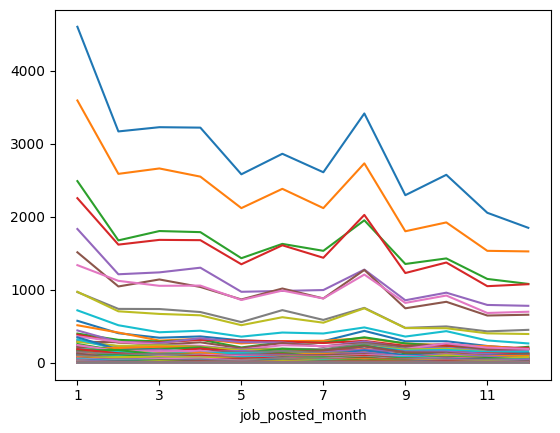

In [11]:
df_pivot.plot(kind = 'line')
plt.legend().remove()

**To convert the data to Percentage**

In [14]:
df_US_Pct = df_US.groupby('job_posted_month').size()
df_US_Pct

job_posted_month
1     8494
2     6124
3     6218
4     6049
5     4993
6     5683
7     5201
8     6634
9     4639
10    5271
11    4531
12    3979
dtype: int64

In [15]:
df_perc = df_pivot.div((df_US_Pct/100),axis = 0)

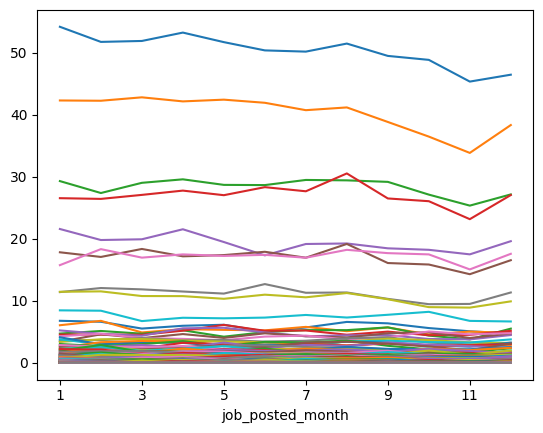

In [18]:
df_perc.plot(kind = 'line')
plt.legend().remove()